In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Successfully loaded ../data/eda_output.csv
Successfully re-created 'passed' feature.


/var/folders/xh/pmc1b1cs7gl1p8tdljq3ch3r0000gn/T/ipykernel_68669/3422060981.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='school', y='passing_rate_pct', data=school_data, palette='Purples_d', order=['GP', 'MS'])
/var/folders/xh/pmc1b1cs7gl1p8tdljq3ch3r0000gn/T/ipykernel_68669/3422060981.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x='studytime_label', y='passing_rate_pct', data=study_data, palette='Greens_d', order=study_labels.values())
/var/folders/xh/pmc1b1cs7gl1p8tdljq3ch3r0000gn/T/ipykernel_68669/3422060981.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to

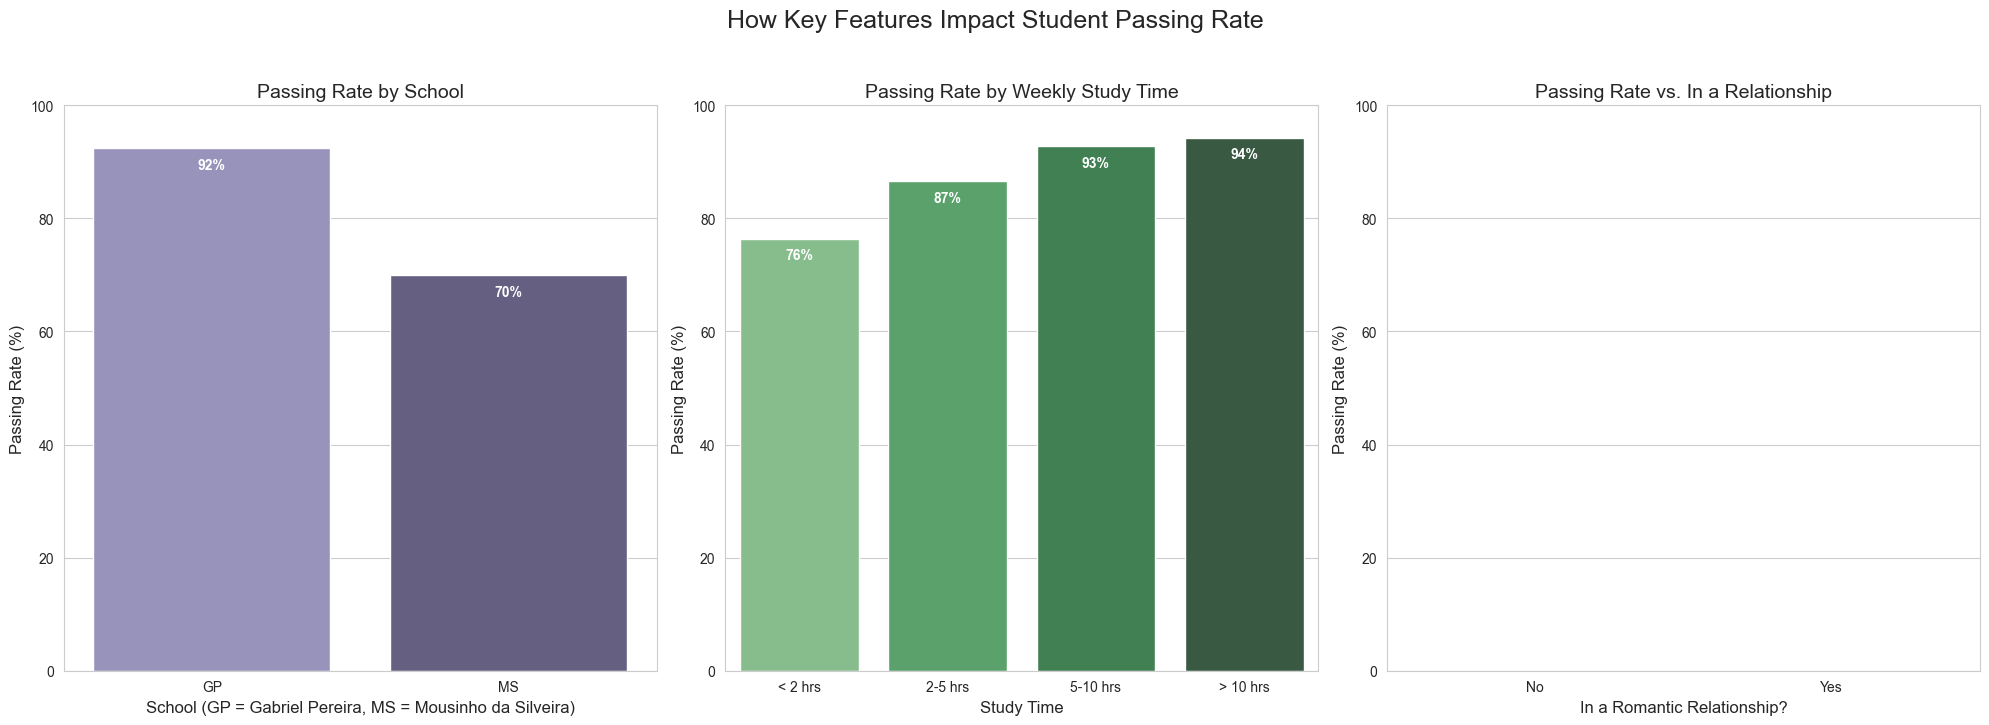

In [18]:


# Set the style for the plots
sns.set_style("whitegrid")

# 1. LOAD THE *ORIGINAL* EDA DATASET
# This path assumes your notebook is in the 'notebooks' folder.
DATA_PATH = "../data/eda_output.csv"

try:
    df = pd.read_csv(DATA_PATH)
    print(f"Successfully loaded {DATA_PATH}")

    # 2. RE-CREATE THE 'passed' COLUMN
    df['at_risk'] = (df['G3'] < 10).astype(int)
    df['passed'] = 1 - df['at_risk']
    
    print("Successfully re-created 'passed' feature.")

    # 3. CREATE THE 3 PLOTS
    fig, axes = plt.subplots(1, 3, figsize=(20, 7))
    fig.suptitle('How Key Features Impact Student Passing Rate', fontsize=18, y=1.03)

    # --- Plot 1: School Name (The #1 Predictor) ---
    school_data = df.groupby('school')['passed'].mean().reset_index()
    school_data['passing_rate_pct'] = school_data['passed'] * 100
    
    sns.barplot(ax=axes[0], x='school', y='passing_rate_pct', data=school_data, palette='Purples_d', order=['GP', 'MS'])
    axes[0].set_title('Passing Rate by School', fontsize=14)
    axes[0].set_ylabel('Passing Rate (%)', fontsize=12)
    axes[0].set_xlabel('School (GP = Gabriel Pereira, MS = Mousinho da Silveira)', fontsize=12)
    axes[0].set_ylim(0, 100)
    # Add labels
    for p in axes[0].patches:
        axes[0].annotate(f'{p.get_height():.0f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, -12), textcoords='offset points', color='white', weight='bold')

    # --- Plot 2: Study Time (The #3 Predictor) ---
    study_data = df.groupby('studytime')['passed'].mean().reset_index()
    study_data['passing_rate_pct'] = study_data['passed'] * 100
    study_labels = {1: '< 2 hrs', 2: '2-5 hrs', 3: '5-10 hrs', 4: '> 10 hrs'}
    study_data['studytime_label'] = study_data['studytime'].map(study_labels)
    
    sns.barplot(ax=axes[1], x='studytime_label', y='passing_rate_pct', data=study_data, palette='Greens_d', order=study_labels.values())
    axes[1].set_title('Passing Rate by Weekly Study Time', fontsize=14)
    axes[1].set_ylabel('Passing Rate (%)', fontsize=12)
    axes[1].set_xlabel('Study Time', fontsize=12)
    axes[1].set_ylim(0, 100)
    # Add labels
    for p in axes[1].patches:
        axes[1].annotate(f'{p.get_height():.0f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, -12), textcoords='offset points', color='white', weight='bold')

    # --- Plot 3: Love Interest ---
    romantic_data = df.groupby('romantic')['passed'].mean().reset_index()
    romantic_data['passing_rate_pct'] = romantic_data['passed'] * 100
    
    sns.barplot(ax=axes[2], x='romantic', y='passing_rate_pct', data=romantic_data, palette='Reds_d', order=['No', 'Yes'])
    axes[2].set_title('Passing Rate vs. In a Relationship', fontsize=14)
    axes[2].set_ylabel('Passing Rate (%)', fontsize=12)
    axes[2].set_xlabel('In a Romantic Relationship?', fontsize=12)
    axes[2].set_ylim(0, 100)
    # Add labels
    for p in axes[2].patches:
        axes[2].annotate(f'{p.get_height():.0f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, -12), textcoords='offset points', color='white', weight='bold')

    plt.tight_layout()
    plt.savefig("feature_analysis_plots.png")
    plt.show()

# --- This part catches the errors ---
except FileNotFoundError:
    print("="*50)
    print(f"CRITICAL ERROR: Could not load '{DATA_PATH}'.")
    print("This is why your plots are empty.")
    print("\nFIX:")
    print("1. Shut down your Jupyter/VS Code.")
    print("2. Re-open it from your project's ROOT folder (the 'capstone-project' folder).")
    print("3. Re-run this cell.")
    print("="*50)
except KeyError as e:
    print(f"ERROR: A required column is missing from the data: {e}")